In [1]:
# for data cleaning and processing
import numpy as np
import pandas as pd

# for drawing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:

df=pd.read_csv('Health Screening Data.csv')

df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Normal,40-50
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Obese,50-60
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Normal,50-60
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Overweight,40-50
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69924,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Overweight,50-60
69925,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Obese,60-70
69926,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Obese,50-60
69927,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Overweight,60-70


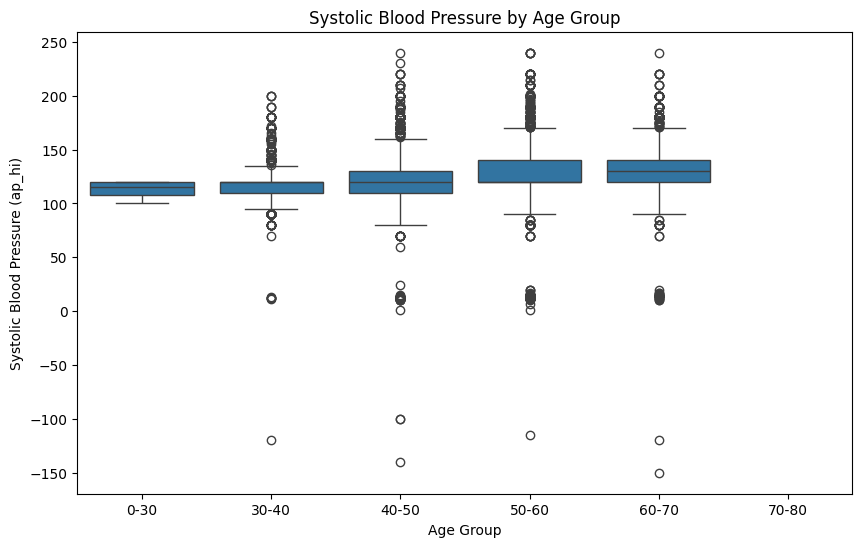

In [4]:
# Define the exact age groups as per your Excel file
age_order = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Set the order for age groups
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=age_order, ordered=True)

# Plotting Systolic Blood Pressure by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='ap_hi', data=df)
plt.title('Systolic Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.show()


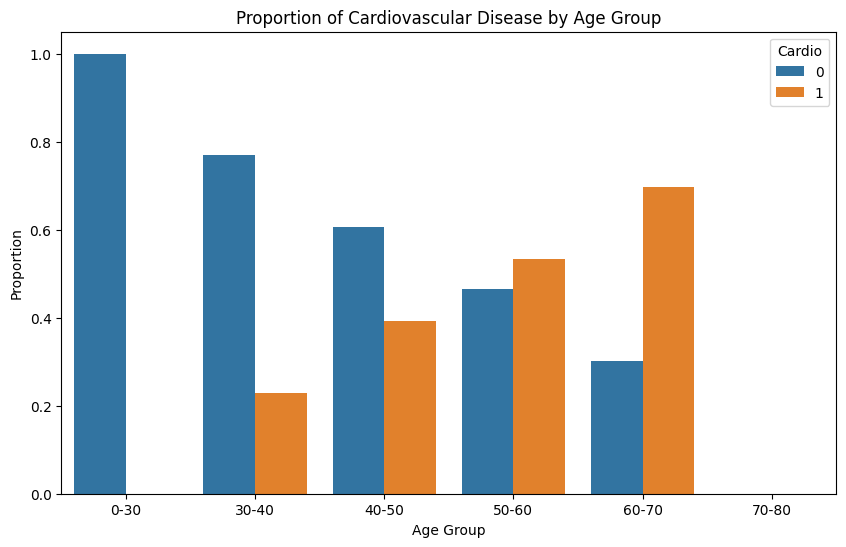

In [6]:
# Calculate proportions
age_cardio_proportion = df.groupby(['AgeGroup', 'cardio']).size().unstack().fillna(0)
age_cardio_proportion = age_cardio_proportion.div(age_cardio_proportion.sum(axis=1), axis=0)

# Melt the dataframe for seaborn
age_cardio_proportion = age_cardio_proportion.reset_index().melt(id_vars='AgeGroup', value_vars=[0, 1])
age_cardio_proportion.columns = ['AgeGroup', 'Cardio', 'Proportion']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Proportion', hue='Cardio', data=age_cardio_proportion, order=age_order)
plt.title('Proportion of Cardiovascular Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()


In [11]:
# Convert categorical variables
df['gender'] = df['gender'].map({1: 'Female', 2: 'Male'})
df['cholesterol'] = df['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['gluc'] = df['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['smoke'] = df['smoke'].map({0: 'Non-Smoker', 1: 'Smoker'})
df['alco'] = df['alco'].map({0: 'Non-Drinker', 1: 'Drinker'})
df['active'] = df['active'].map({0: 'Inactive', 1: 'Active'})

# Define a function to calculate proportions and plot
def plot_proportion(data, category, hue, title, xlabel):
    # Calculate proportions
    proportion = data.groupby([category, hue]).size().unstack().fillna(0)
    proportion = proportion.div(proportion.sum(axis=1), axis=0)

    # Melt the dataframe for seaborn
    proportion = proportion.reset_index().melt(id_vars=category, value_vars=[0, 1])
    proportion.columns = [category, 'Cardio', 'Proportion']

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Proportion', hue='Cardio', data=proportion, order=data[category].cat.categories if pd.api.types.is_categorical_dtype(data[category]) else None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.show()


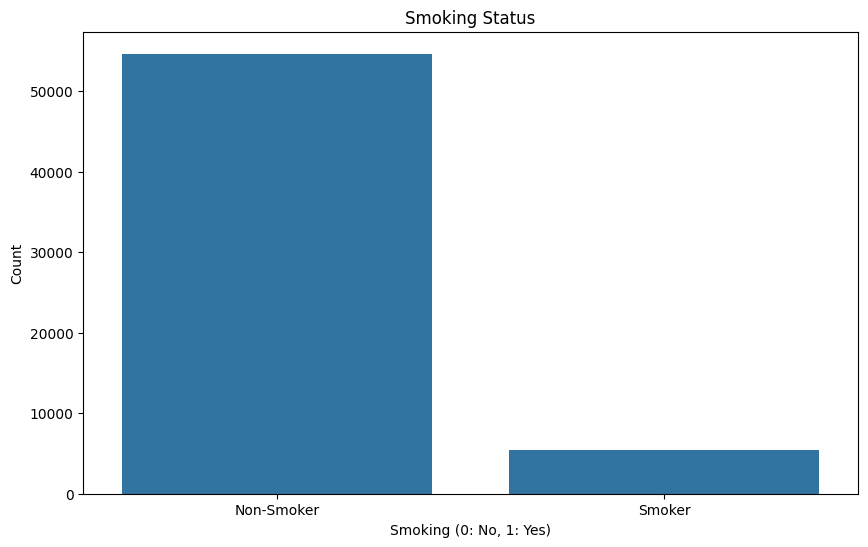

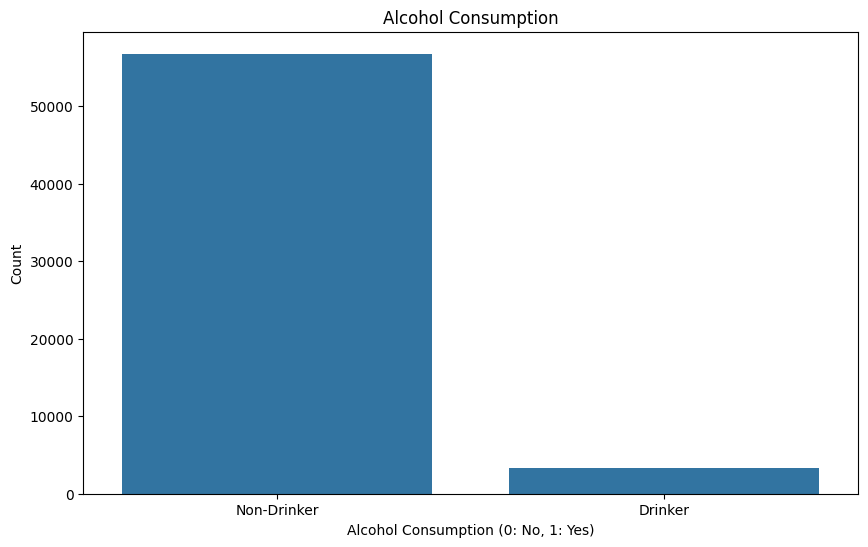

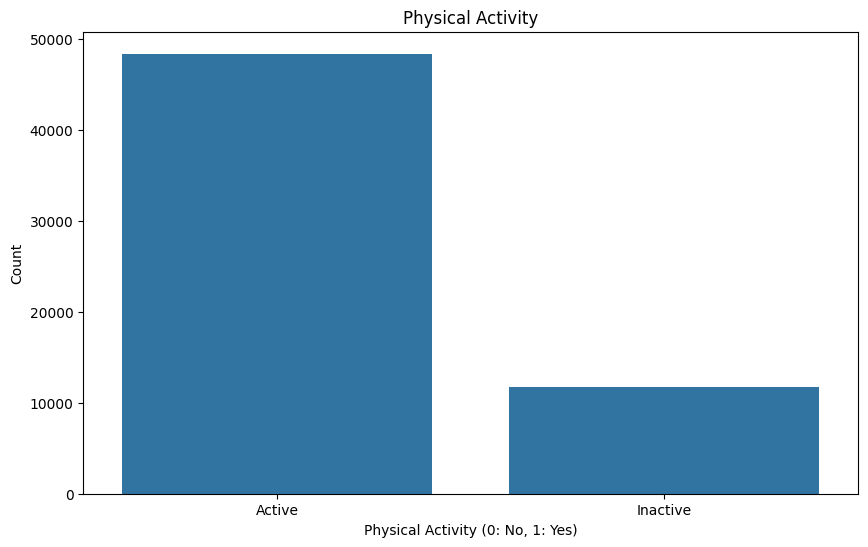

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to create count plots
def plot_count(data, category, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=category, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plotting smoking status, alcohol consumption, and physical activity using the function
plot_count(df, 'smoke', 'Smoking Status', 'Smoking (0: No, 1: Yes)', 'Count')
plot_count(df, 'alco', 'Alcohol Consumption', 'Alcohol Consumption (0: No, 1: Yes)', 'Count')
plot_count(df, 'active', 'Physical Activity', 'Physical Activity (0: No, 1: Yes)', 'Count')


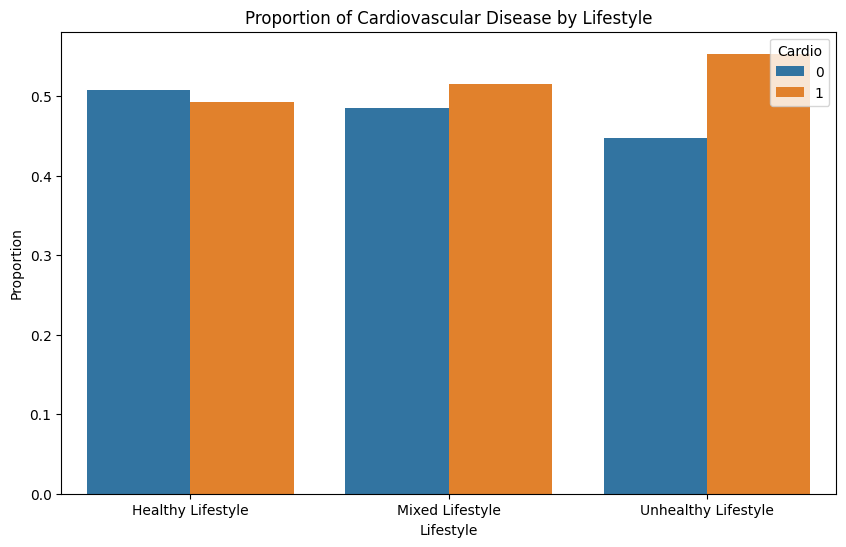

In [12]:
# Create a new column for lifestyle comparison
def categorize_lifestyle(row):
    if row['smoke'] == 'Non-Smoker' and row['alco'] == 'Non-Drinker' and row['active'] == 'Active':
        return 'Healthy Lifestyle'
    elif row['smoke'] == 'Smoker' and row['alco'] == 'Drinker' and row['active'] == 'Inactive':
        return 'Unhealthy Lifestyle'
    else:
        return 'Mixed Lifestyle'

df['Lifestyle'] = df.apply(categorize_lifestyle, axis=1)

# Define a function to calculate proportions and plot
def plot_proportion(data, category, hue, title, xlabel):
    # Calculate proportions
    proportion = data.groupby([category, hue]).size().unstack().fillna(0)
    proportion = proportion.div(proportion.sum(axis=1), axis=0)

    # Melt the dataframe for seaborn
    proportion = proportion.reset_index().melt(id_vars=category, value_vars=[0, 1])
    proportion.columns = [category, 'Cardio', 'Proportion']

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Proportion', hue='Cardio', data=proportion, order=data[category].cat.categories if pd.api.types.is_categorical_dtype(data[category]) else None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.show()

# Plot proportions for each category

plot_proportion(df, 'Lifestyle', 'cardio', 'Proportion of Cardiovascular Disease by Lifestyle', 'Lifestyle')

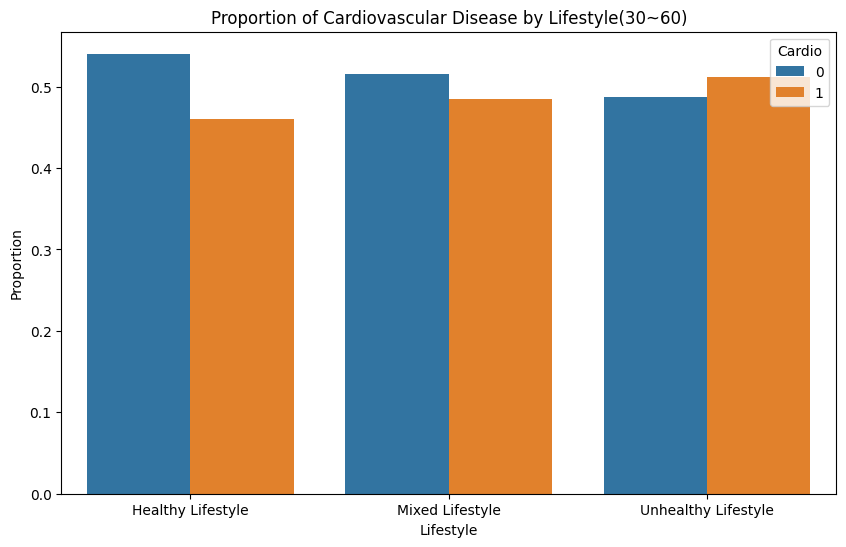

In [13]:
# Filter the DataFrame for individuals aged 30 to 60 years old
df = df[(df['AgeinYr'] >= 30) & (df['AgeinYr'] <= 60)]

# Create a new column for lifestyle comparison
def categorize_lifestyle(row):
    if row['smoke'] == 'Non-Smoker' and row['alco'] == 'Non-Drinker' and row['active'] == 'Active':
        return 'Healthy Lifestyle'
    elif row['smoke'] == 'Smoker' and row['alco'] == 'Drinker' and row['active'] == 'Inactive':
        return 'Unhealthy Lifestyle'
    else:
        return 'Mixed Lifestyle'

df['Lifestyle'] = df.apply(categorize_lifestyle, axis=1)

# Define a function to calculate proportions and plot
def plot_proportion(data, category, hue, title, xlabel):
    # Calculate proportions
    proportion = data.groupby([category, hue]).size().unstack().fillna(0)
    proportion = proportion.div(proportion.sum(axis=1), axis=0)

    # Melt the dataframe for seaborn
    proportion = proportion.reset_index().melt(id_vars=category, value_vars=[0, 1])
    proportion.columns = [category, 'Cardio', 'Proportion']

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Proportion', hue='Cardio', data=proportion, order=data[category].cat.categories if pd.api.types.is_categorical_dtype(data[category]) else None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.show()

# Plot proportions for each category

plot_proportion(df, 'Lifestyle', 'cardio', 'Proportion of Cardiovascular Disease by Lifestyle(30~60)', 'Lifestyle')